In [1]:
import json
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Import data

In [2]:
#Since the review.json does not include business’ details, we would need to merge the review file with the 
#business file if we want to have details of what kind of business each review is for.

#Load the business.json file
#Set up the business.json environment path to load using Pandas

business_json_path='business.json'
df_b=pd.read_json(business_json_path,lines=True)

In [3]:
#df_b.head()
df_b.columns

Index(['business_id', 'full_address', 'hours', 'open', 'categories', 'city',
       'review_count', 'name', 'neighborhoods', 'longitude', 'state', 'stars',
       'latitude', 'attributes', 'type'],
      dtype='object')

In [4]:
#Load the user.json file
#Set up the business.json environment path to load using Pandas

user_json_path='user.json'
df_u=pd.read_json(user_json_path,lines=True)

In [5]:
#df_u.head()
df_u.head()

,yelping_since,votes,review_count,name,user_id,friends,fans,average_stars,type,compliments,elite
0,2004-10,"{'funny': 167, 'useful': 282, 'cool': 246}",108,Russel,18kPq7GPye-YQ3LyKyAZPw,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",69,4.14,user,"{'profile': 8, 'cute': 15, 'funny': 11, 'plain...","[2005, 2006]"
1,2004-10,"{'funny': 8399, 'useful': 15242, 'cool': 12091}",1292,Jeremy,rpOyqD_893cqmDAtJLbdog,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",1345,3.67,user,"{'profile': 117, 'cute': 204, 'funny': 594, 'p...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201..."
2,2004-10,"{'funny': 722, 'useful': 1349, 'cool': 657}",395,Michael,4U9kSBLuBDU391x6bxU-YA,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",105,3.68,user,"{'profile': 9, 'cute': 22, 'funny': 96, 'plain...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201..."
3,2004-10,"{'funny': 1, 'useful': 11, 'cool': 5}",11,Ken,fHtTaujcyKvXglE33Z5yIw,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",2,4.64,user,{'cute': 2},[]
4,2004-10,"{'funny': 13, 'useful': 37, 'cool': 16}",66,Katherine,SIBCL7HBkrP4llolm4SC2A,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",5,3.80,user,"{'cute': 2, 'plain': 2, 'writer': 2, 'note': 1...",[2005]


In [6]:
#Load the review.json file
#Set up the business.json environment path to load using Pandas

review_json_path='review.json'
df_r=pd.read_json(review_json_path,lines=True)

In [7]:
#df_r.head()
#df_r.columns, df_r.describe()

In [8]:
#Load the checkins.json file
#Set up the business.json environment path to load using Pandas

checkin_json_path='checkin.json'
df_c=pd.read_json(checkin_json_path,lines=True)

In [9]:
#df_c.head()
#df_c.columns, df_c.describe()

In [10]:
#Load the tips.json file
#Set up the tips.json environment path to load using Pandas

tip_json_path='tip.json'
df_t=pd.read_json(tip_json_path,lines=True)

In [11]:
#df_t.head()
#df_t.columns , df_t.describe()

In [12]:
df_b

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,5UmKMjUEUNdYWqANhGckJw,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Friday': {'close': '21:00', 'open': '11:00'}...",True,"[Fast Food, Restaurants]",Dravosburg,7,Mr Hoagie,[],-79.900706,PA,3.5,40.354327,"{'Take-out': True, 'Drive-Thru': False, 'Good ...",business
1,UsFtqoBl7naz8AVUBZMjQQ,"202 McClure St\nDravosburg, PA 15034",{},True,[Nightlife],Dravosburg,5,Clancy's Pub,[],-79.886814,PA,3.0,40.350553,"{'Happy Hour': True, 'Accepts Credit Cards': T...",business
2,cE27W9VPgO88Qxe4ol6y_g,"1530 Hamilton Rd\nBethel Park, PA 15234",{},False,"[Active Life, Mini Golf, Golf]",Bethel Park,5,Cool Springs Golf Center,[],-80.014660,PA,2.5,40.354115,{'Good for Kids': True},business
3,mVHrayjG3uZ_RLHkLj-AMg,"414 Hawkins Ave\nBraddock, PA 15104","{'Tuesday': {'close': '19:00', 'open': '10:00'...",True,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,26,Emil's Lounge,[],-79.866211,PA,4.5,40.408830,"{'Alcohol': 'full_bar', 'Noise Level': 'averag...",business
4,mYSpR_SLPgUVymYOvTQd_Q,"1000 Clubhouse Dr\nBraddock, PA 15104","{'Sunday': {'close': '15:00', 'open': '10:00'}...",True,"[Active Life, Golf]",Braddock,3,Grand View Golf Club,[],-79.855782,PA,5.0,40.403405,"{'Parking': {'garage': False, 'street': False,...",business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85896,m7-3lyY0CJEhePfJKWtD3w,"3899 East Sunset Rd\nSte 105\nLas Vegas, NV 89120","{'Tuesday': {'close': '18:00', 'open': '10:00'...",True,"[Bridal, Fashion, Shopping, Formal Wear]",Las Vegas,61,Bowties Bridal,[],-115.089318,NV,4.0,36.070535,{'Accepts Credit Cards': True},business
85897,g0vvhkZWZKlwF8BUeSPaTA,"525 N Estrella Pkwy\nSte 100\nGoodyear, AZ 85338",{},True,"[Mexican, Restaurants]",Goodyear,89,Senor Taco,[],-112.392009,AZ,3.5,33.452205,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business
85898,46L_7y9QXffPpOaXNLX8hg,"9215 North 7th St\nPhoenix, AZ 85020","{'Monday': {'close': '18:00', 'open': '07:00'}...",True,"[Car Wash, Automotive]",Phoenix,7,Cobblestone Auto Spa,[],-112.064854,AZ,3.0,33.570417,{},business
85899,HuLzZUBkHEcHk6ETDJIVhQ,16 Waterloo Place\nOld Town\nEdinburgh EH1 3EG,{},True,"[Home Services, Real Estate, Apartments]",Edinburgh,5,Princess Street Suites,[Old Town],-3.186813,EDH,4.0,55.953447,"{'Accepts Credit Cards': True, 'Wi-Fi': 'free'...",business


In [13]:
df_b["state"].unique()

array(['PA', 'NC', 'SC', 'WI', 'IL', 'AZ', 'CA', 'NV', 'FL', 'NM', 'QC',
       'ON', 'TX', 'EDH', 'MLN', 'HAM', 'SCB', 'ELN', 'FIF', 'NTH', 'XGL',
       'BW', 'RP', 'KHL', 'MN', 'NW', 'TAM', 'AL', '', 'AK'], dtype=object)

#  Data preparation - Numerical Features

In [14]:
# Filtering Restaurant business in the state of Nevada
business_df=df_b[df_b["state"]=="AZ"]

In [15]:
#Select only restaurants from many different categories

res = ["Restaurant", "restaurant"]
business_df['split_categories'] = 0

for i in range(len(business_df['categories'])):
  cat = str(business_df['categories'].iloc[i])
  cat.split(',')
  if any(item in cat for item in res):
    business_df['split_categories'].iloc[i] = 1

In [16]:
restaurant = business_df[business_df['split_categories']==1]
restaurant_open = restaurant[restaurant['open']==1]
restaurant_open.describe()

,review_count,longitude,stars,latitude,split_categories
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.0
mean,84.768667,-111.998932,3.410591,33.475118,1.0
std,131.519715,0.202536,0.791845,0.151945,0.0
min,3.000000,-112.937844,1.000000,32.872254,1.0
25%,12.000000,-112.120386,3.000000,33.389520,1.0
50%,38.000000,-111.979848,3.500000,33.466258,1.0
75%,102.000000,-111.877053,4.000000,33.581695,1.0
max,1743.000000,-111.288684,5.000000,34.048668,1.0


In [17]:
restaurant_open["avg_openinghrs"]=restaurant_open["review_count"]

In [18]:
#create a new numerical variable that measures the average opening hours during weekdays and average opening hours during weekend

for i in list(restaurant_open.index):
    opening_hrs=[]
    days=list(restaurant_open["hours"][i].keys())
    for j in days:
        close = float(restaurant_open["hours"][i][j]["close"][:2])
        if close==0:
            close = 24
        if close==1:
            close =25
        if close==2:
            close =26
        if close==3:
            close =27
        else:
            close
        close_time=close*60+float((restaurant_open["hours"][i][j]["close"][3:]))
        open_time=float(restaurant_open["hours"][i][j]["open"][:2])*60+float((restaurant_open["hours"][i][j]["open"][3:]))
        opening_hrs.append((close_time-open_time)/60)
    avg=np.sum(opening_hrs)/len(days)
    restaurant_open["avg_openinghrs"][i]=avg

In [19]:
for i in range(len(restaurant_open.index)):
    idx=restaurant_open.index[i]
    if restaurant_open["avg_openinghrs"][idx]<0:
        restaurant_open["avg_openinghrs"][idx]=-restaurant_open["avg_openinghrs"][idx]
    else:
        None

In [20]:
restaurant_open["number_categories"]=restaurant_open["categories"]

In [21]:
#create a new variable that indicates how many types of business categories correspond to a restaurant 
for i in list(restaurant_open.index):
    restaurant_open["number_categories"][i] = len(restaurant_open["categories"][i])

In [22]:
#create a new variable that indicates the number of tips received by a business

restaurant_open["tips"]=restaurant_open["business_id"]
business_id=restaurant_open["business_id"]
for i in range(len(restaurant_open.index)):
    idx=restaurant_open.index[i]
    business_id=restaurant_open["business_id"][idx]
    restaurant_open["tips"][idx]=df_t[df_t["business_id"]==business_id].count()[1]


In [23]:
#create a new variable that indicates the number of checkins received by a business

restaurant_open["checkins"]=restaurant_open["business_id"]
business_id=restaurant_open["business_id"]
for i in range(len(restaurant_open.index)):
    idx=restaurant_open.index[i]
    business_id=restaurant_open["business_id"][idx]
    restaurant_open["checkins"][idx]=df_c[df_c["business_id"]==business_id].count()[0]

In [24]:
business_list=list(restaurant_open["business_id"])

In [25]:
reviews=df_r[df_r["business_id"].isin(business_list)]

In [26]:
users_avg=reviews.groupby('user_id').mean().reset_index()
users_avg

,user_id,stars
0,--4TkB_iDShmg41Y_QW9nw,4.047619
1,--65q1FpAL_UQtVZ2PTGew,3.960784
2,--82_AVgRBsLw6Dhy8sEnA,4.000000
3,--AqBuo717RyacADExYbSA,3.142857
4,--CUu8WmGg1b9tsbSFzfoQ,3.000000
...,...,...
156038,zzr0gcwOWFGBBqQ11_xPOQ,3.800000
156039,zztT9KKp0rmJRMeMl4CqzQ,3.000000
156040,zzunUJtZqhcxDB3plnSFxg,5.000000
156041,zzvrDmRAYdvIVRGszSFPGQ,5.000000


In [27]:
restaurant_open["avg_stars_user"]=restaurant_open["tips"]
for i in range(len(business_list)):
    name_business=business_list[i]
    temp_df=reviews[reviews["business_id"]==name_business]
    avg_stars=np.mean(users_avg[users_avg["user_id"].isin(temp_df["user_id"])]["stars"])
    idx_df_rest=restaurant_open.index[restaurant_open["business_id"]==name_business][0]
    restaurant_open["avg_stars_user"][idx_df_rest]=avg_stars

In [28]:
restaurant_open["avg_stars_user"]=restaurant_open["avg_stars_user"].apply(lambda x: round(x, 1))

In [29]:
restaurant_open=restaurant_open.dropna()
restaurant_open["avg_openinghrs"]

2377     14.000000
2382     18.000000
2386      9.428571
2394     10.714286
2397     16.571429
           ...    
85880     8.000000
85881    11.142857
85884    11.571429
85889     7.000000
85890    13.428571
Name: avg_openinghrs, Length: 4925, dtype: float64

#  Data preparation - Categorical Features

In [30]:
#We also need to one-hot encode the business attributes and their sub-attributes, which are currently in dictionaries in the 'attributes' column.

df2=restaurant_open['attributes'].apply(pd.Series)
df2.head()

,Take-out,Wi-Fi,Good For,Caters,Noise Level,Takes Reservations,Has TV,Delivery,Ambience,Parking,...,Happy Hour,Open 24 Hours,Order at Counter,Drive-Thru,BYOB,Corkage,BYOB/Corkage,By Appointment Only,Dietary Restrictions,Accepts Insurance
2377,True,no,"{'dessert': False, 'latenight': False, 'lunch'...",False,loud,False,False,True,"{'romantic': False, 'intimate': False, 'classy...","{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2382,False,no,"{'dessert': False, 'latenight': False, 'lunch'...",False,very_loud,True,True,False,"{'romantic': False, 'intimate': False, 'classy...","{'garage': True, 'street': False, 'validated':...",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2386,True,free,"{'dessert': False, 'latenight': False, 'lunch'...",True,average,True,True,False,"{'romantic': False, 'intimate': False, 'touris...","{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2394,True,no,"{'dessert': False, 'latenight': False, 'lunch'...",False,average,True,True,False,"{'romantic': False, 'intimate': False, 'touris...","{'garage': True, 'street': False, 'validated':...",...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2397,True,NaN,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,False,NaN,False,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
restaurant_open.columns

Index(['business_id', 'full_address', 'hours', 'open', 'categories', 'city',
       'review_count', 'name', 'neighborhoods', 'longitude', 'state', 'stars',
       'latitude', 'attributes', 'type', 'split_categories', 'avg_openinghrs',
       'number_categories', 'tips', 'checkins', 'avg_stars_user'],
      dtype='object')

In [32]:
perc_NA=df2.isna().sum()/len(df2)
perc_NA_df=pd.DataFrame(perc_NA>0.5)
cols=list(perc_NA_df[perc_NA_df[0]==False].index)
cols_dict=["Good For","Ambience","Parking"]
relevant_cols=list(set(cols).difference(cols_dict))
categorical_df=df2.loc[:,relevant_cols]
categorical_df

,Wi-Fi,Good for Kids,Outdoor Seating,Delivery,Has TV,Caters,Wheelchair Accessible,Waiter Service,Attire,Price Range,Accepts Credit Cards,Alcohol,Take-out,Noise Level,Good For Groups,Takes Reservations
2377,no,True,False,True,False,False,True,False,casual,1.0,True,none,True,loud,False,False
2382,no,False,True,False,True,False,True,False,casual,1.0,True,full_bar,False,very_loud,True,True
2386,free,True,True,False,True,True,True,True,casual,2.0,True,full_bar,True,average,True,True
2394,no,True,True,False,True,False,True,True,casual,2.0,True,full_bar,True,average,True,True
2397,NaN,True,NaN,False,NaN,NaN,NaN,False,casual,3.0,True,none,True,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85880,no,True,False,False,False,True,True,NaN,casual,2.0,True,none,True,average,True,False
85881,NaN,True,NaN,NaN,True,NaN,NaN,True,casual,3.0,True,NaN,True,NaN,True,True
85884,NaN,True,NaN,True,False,NaN,NaN,NaN,casual,1.0,True,NaN,True,NaN,True,False
85889,free,True,True,False,False,True,True,False,casual,2.0,True,full_bar,True,average,True,False


In [33]:
relevant_cols

['Wi-Fi',
 'Good for Kids',
 'Outdoor Seating',
 'Delivery',
 'Has TV',
 'Caters',
 'Wheelchair Accessible',
 'Waiter Service',
 'Attire',
 'Price Range',
 'Accepts Credit Cards',
 'Alcohol',
 'Take-out',
 'Noise Level',
 'Good For Groups',
 'Takes Reservations']

In [34]:
cuisine=pd.DataFrame(restaurant_open["categories"].apply(pd.Series)[0], index=restaurant_open.index)
cuisine.columns=["Cuisine"]


In [108]:
restaurants_df=pd.concat([restaurant_open,categorical_df,cuisine],axis=1).dropna()
len(restaurants_df.columns)

38

In [36]:
relevant_cols.append(cuisine.columns[0])
relevant_cols.append("city")

In [37]:
final_df=pd.concat([restaurant_open,categorical_df,cuisine],axis=1).dropna()

In [38]:
final_df.columns

Index(['business_id', 'full_address', 'hours', 'open', 'categories', 'city',
       'review_count', 'name', 'neighborhoods', 'longitude', 'state', 'stars',
       'latitude', 'attributes', 'type', 'split_categories', 'avg_openinghrs',
       'number_categories', 'tips', 'checkins', 'avg_stars_user', 'Wi-Fi',
       'Good for Kids', 'Outdoor Seating', 'Delivery', 'Has TV', 'Caters',
       'Wheelchair Accessible', 'Waiter Service', 'Attire', 'Price Range',
       'Accepts Credit Cards', 'Alcohol', 'Take-out', 'Noise Level',
       'Good For Groups', 'Takes Reservations', 'Cuisine'],
      dtype='object')

In [39]:
for i in relevant_cols:
    final_df[i]=final_df[i].astype('category')
    final_df[i]=final_df[i].cat.codes


# Correlation analysis

Usually, in statistics, we measure four types of correlations:
* Pearson correlation
* Kendall rank correlation
* Spearman correlation
* Point-Biserial correlation
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
**Assumptions of Pearson Correlation**
1. For the Pearson r correlation, both variables should be normally distributed. i.e the normal distribution describes how the values of a variable are distributed. This is sometimes called the ‘Bell Curve’ or the ‘Gaussian Curve’. A simple way to do this is to determine the normality of each variable separately using the Shapiro-Wilk Test.
2. There should be no significant outliers. We all know what outliers are but we don’t know the effect of outliers on Pearson’s correlation coefficient, r. Pearson’s correlation coefficient, r, is very sensitive to outliers, which can have a very large effect on the line of best fit and the Pearson correlation coefficient. This means — including outliers in your analysis can lead to misleading results.
3. Each variable should be continuous i.e. interval or ratios for example weight, time, height, age etc. If one or both of the variables are ordinal in measurement, then a Spearman correlation could be conducted instead.
4. The two variables have a linear relationship. Scatter plots will help you tell whether the variables have a linear relationship. If the data points have a straight line (and not a curve), then the data satisfies the linearity assumption. If the data you have is not linearly related you might have to run a non-parametric .

https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
important_cols=[ 'city',"review_count",'number_categories', 'tips', 'avg_stars_user', 'Delivery','avg_openinghrs',
       'Takes Reservations', 'Attire', 'Waiter Service', 'Caters',
       'Price Range', 'Alcohol', 'Outdoor Seating', 'Accepts Credit Cards',
       'Has TV', 'Good for Kids', 'Noise Level', 'Wheelchair Accessible',
       'Good For Groups', 'Take-out', 'Wi-Fi', 'Cuisine']

In [42]:
restaurants_df=pd.concat([restaurants_df[important_cols], restaurants_df["stars"]],axis=1)
final_df=pd.concat([final_df[important_cols],final_df["stars"]],axis=1)


In [43]:
restaurants_df

,city,review_count,number_categories,tips,avg_stars_user,Delivery,avg_openinghrs,Takes Reservations,Attire,Waiter Service,...,Accepts Credit Cards,Has TV,Good for Kids,Noise Level,Wheelchair Accessible,Good For Groups,Take-out,Wi-Fi,Cuisine,stars
2377,Phoenix,20,4,5,3.3,True,14.000000,False,casual,False,...,True,False,True,loud,True,False,True,no,Sandwiches,3.0
2382,Phoenix,28,4,3,2.9,False,18.000000,True,casual,False,...,True,True,False,very_loud,True,True,False,no,American (New),2.5
2386,Phoenix,492,2,108,3.8,False,9.428571,True,casual,True,...,True,True,True,average,True,True,True,free,Thai,3.5
2394,Phoenix,280,4,49,3.7,False,10.714286,True,casual,True,...,True,True,True,average,True,True,True,no,Cafes,3.5
2404,Phoenix,12,4,8,3.7,False,18.285714,False,casual,False,...,True,False,True,average,True,True,True,no,Fast Food,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85571,Chandler,25,5,5,4.1,False,10.071429,False,casual,False,...,True,False,True,average,True,True,True,free,Food,4.5
85674,Phoenix,58,3,5,3.6,False,13.571429,True,casual,True,...,True,True,False,loud,True,True,True,free,Gastropubs,3.5
85708,Phoenix,20,4,2,4.4,True,9.285714,False,casual,False,...,True,False,True,average,False,True,True,no,Vegetarian,4.5
85775,Gilbert,27,3,5,4.2,False,9.714286,False,casual,True,...,True,True,True,average,True,True,True,free,Asian Fusion,4.5


In [44]:
np.sum(final_df["stars"]==3.5)/len(final_df["stars"]), np.sum(final_df["stars"]==4.0)/len(final_df["stars"]),np.sum(final_df["stars"]==5.0)/len(final_df["stars"])



(0.3059971098265896, 0.34934971098265893, 0.00939306358381503)

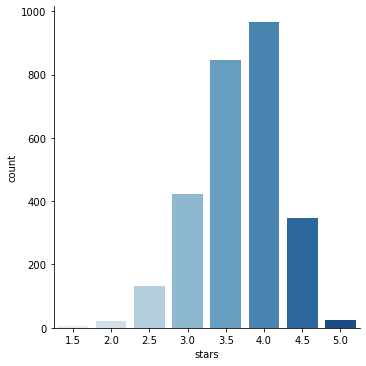

In [45]:
sns.catplot(x="stars", kind="count", palette="Blues", data=final_df)


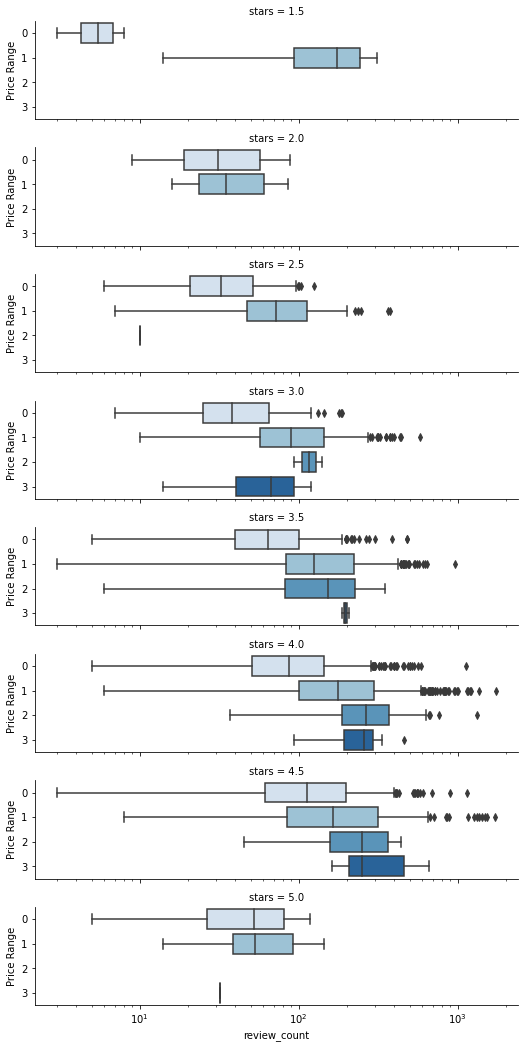

In [46]:
g = sns.catplot(x="review_count", y="Price Range", row="stars",
                kind="box", orient="h", height=1.8, aspect=4,palette="Blues",
                data=final_df)
g.set(xscale="log")

In [47]:
restaurants_df


,city,review_count,number_categories,tips,avg_stars_user,Delivery,avg_openinghrs,Takes Reservations,Attire,Waiter Service,...,Accepts Credit Cards,Has TV,Good for Kids,Noise Level,Wheelchair Accessible,Good For Groups,Take-out,Wi-Fi,Cuisine,stars
2377,Phoenix,20,4,5,3.3,True,14.000000,False,casual,False,...,True,False,True,loud,True,False,True,no,Sandwiches,3.0
2382,Phoenix,28,4,3,2.9,False,18.000000,True,casual,False,...,True,True,False,very_loud,True,True,False,no,American (New),2.5
2386,Phoenix,492,2,108,3.8,False,9.428571,True,casual,True,...,True,True,True,average,True,True,True,free,Thai,3.5
2394,Phoenix,280,4,49,3.7,False,10.714286,True,casual,True,...,True,True,True,average,True,True,True,no,Cafes,3.5
2404,Phoenix,12,4,8,3.7,False,18.285714,False,casual,False,...,True,False,True,average,True,True,True,no,Fast Food,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85571,Chandler,25,5,5,4.1,False,10.071429,False,casual,False,...,True,False,True,average,True,True,True,free,Food,4.5
85674,Phoenix,58,3,5,3.6,False,13.571429,True,casual,True,...,True,True,False,loud,True,True,True,free,Gastropubs,3.5
85708,Phoenix,20,4,2,4.4,True,9.285714,False,casual,False,...,True,False,True,average,False,True,True,no,Vegetarian,4.5
85775,Gilbert,27,3,5,4.2,False,9.714286,False,casual,True,...,True,True,True,average,True,True,True,free,Asian Fusion,4.5


In [48]:
restaurants_df["Cuisine"].value_counts()[:10]
top5=["Bars","Mexican","Breakfast & Brunch","Burgers","American","Pizza","Italian","Fast Food","Chinese"]

In [49]:
top_cuisines=restaurants_df.groupby('Cuisine').mean().reset_index()
top_cuisines=top_cuisines[top_cuisines["Cuisine"].isin(top5)]
#top_cuisines["stars"]=top_cuisines["stars"].astype("category")
top_cuisines

,Cuisine,review_count,avg_stars_user,avg_openinghrs,Price Range,stars
10,Bars,177.546980,3.687919,12.213207,1.953020,3.533557
12,Breakfast & Brunch,171.888889,3.691813,12.603759,1.573099,3.584795
15,Burgers,146.028571,3.691429,12.559354,1.421429,3.600000
26,Chinese,90.797872,3.626596,9.866388,1.265957,3.547872
35,Fast Food,46.084211,3.555789,12.718020,1.063158,3.389474
50,Italian,175.477477,3.753153,10.530995,1.657658,3.752252
58,Mexican,137.795276,3.718110,11.755427,1.464567,3.590551
68,Pizza,85.234234,3.627027,10.948027,1.477477,3.599099


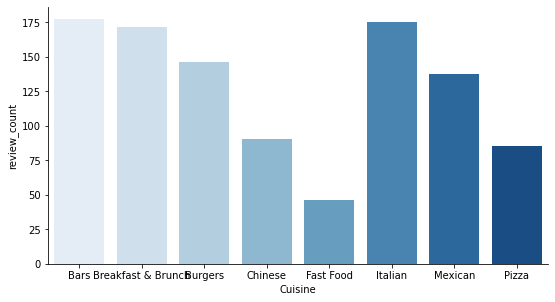

In [50]:

f=sns.catplot(x="Cuisine", y="review_count",kind='bar',data=top_cuisines,palette="Blues")
f.fig.set_size_inches(8,4)


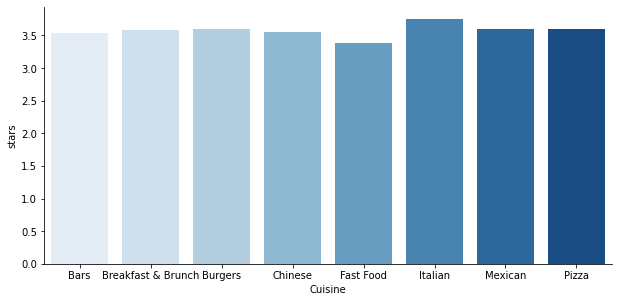

In [98]:
f=sns.catplot(x="Cuisine", y="stars",kind='bar',data=top_cuisines,palette="Blues")
f.fig.set_size_inches(9,4)

In [51]:
cont_cols=["avg_openinghrs","review_count","number_categories","avg_stars_user","tips","Price Range","stars"]

In [52]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768 entries, 2377 to 85889
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   2768 non-null   int8   
 1   review_count           2768 non-null   int64  
 2   number_categories      2768 non-null   object 
 3   tips                   2768 non-null   object 
 4   avg_stars_user         2768 non-null   float64
 5   Delivery               2768 non-null   int8   
 6   avg_openinghrs         2768 non-null   float64
 7   Takes Reservations     2768 non-null   int8   
 8   Attire                 2768 non-null   int8   
 9   Waiter Service         2768 non-null   int8   
 10  Caters                 2768 non-null   int8   
 11  Price Range            2768 non-null   int8   
 12  Alcohol                2768 non-null   int8   
 13  Outdoor Seating        2768 non-null   int8   
 14  Accepts Credit Cards   2768 non-null   int8   
 15  

In [53]:
final_df["tips"]=final_df["tips"].apply(pd.to_numeric)
restaurants_df["tips"]=restaurants_df["tips"].apply(pd.to_numeric)

final_df["number_categories"]=final_df["number_categories"].apply(pd.to_numeric)
restaurants_df["number_categories"]=restaurants_df["number_categories"].apply(pd.to_numeric)

In [54]:
final_df.to_csv("final.csv",index=False)

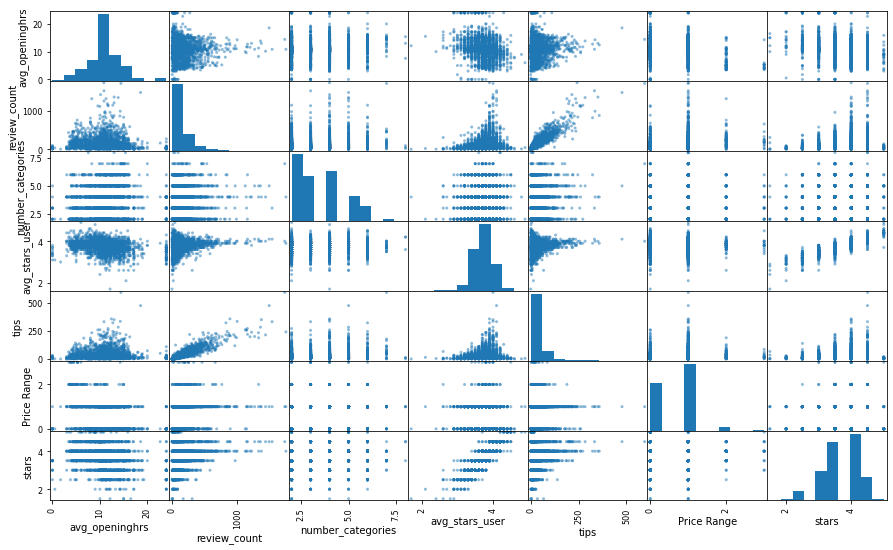

In [55]:
#First identify the relationship between continuous variable in our dataset. See whether you observe any linearity.

#it seems like a linear relationship may exist between avg_stars_users and 
fig1=pd.plotting.scatter_matrix(final_df[cont_cols],figsize=(15,9))
# we obs

In [56]:
#Conclusion we don't observe linear relationship and variables are not normally distributed. Use Spearman test instead
from scipy.stats import shapiro
stat, p = shapiro(final_df["avg_stars_user"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.5
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.966, p=0.000
Sample does not look Gaussian (reject H0)


In [57]:
final_df["stars"]=final_df["stars"].astype(float)

In [58]:
#Therefore we use non-parametric approaches to estimate correlation: 
#https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/

corr_cont=final_df[cont_cols].corr(method='spearman')
corr_cont

,avg_openinghrs,review_count,number_categories,avg_stars_user,tips,Price Range,stars
avg_openinghrs,1.000000,-0.107007,0.166578,-0.268847,0.042434,-0.108196,-0.286074
review_count,-0.107007,1.000000,0.083865,0.288276,0.880091,0.368421,0.273761
number_categories,0.166578,0.083865,1.000000,0.073162,0.113558,0.151858,0.039784
avg_stars_user,-0.268847,0.288276,0.073162,1.000000,0.167283,-0.017555,0.871574
tips,0.042434,0.880091,0.113558,0.167283,1.000000,0.251516,0.162344
Price Range,-0.108196,0.368421,0.151858,-0.017555,0.251516,1.000000,-0.055285
stars,-0.286074,0.273761,0.039784,0.871574,0.162344,-0.055285,1.000000


In [59]:
final_df

,city,review_count,number_categories,tips,avg_stars_user,Delivery,avg_openinghrs,Takes Reservations,Attire,Waiter Service,...,Accepts Credit Cards,Has TV,Good for Kids,Noise Level,Wheelchair Accessible,Good For Groups,Take-out,Wi-Fi,Cuisine,stars
2377,31,20,4,5,3.3,1,14.000000,0,0,0,...,1,0,1,1,1,0,1,1,74,3.0
2382,31,28,4,3,2.9,0,18.000000,1,0,0,...,1,1,0,3,1,1,0,1,2,2.5
2386,31,492,2,108,3.8,0,9.428571,1,0,1,...,1,1,1,0,1,1,1,0,88,3.5
2394,31,280,4,49,3.7,0,10.714286,1,0,1,...,1,1,1,0,1,1,1,1,16,3.5
2404,31,12,4,8,3.7,0,18.285714,0,0,0,...,1,0,1,0,1,1,1,1,35,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85571,10,25,5,5,4.1,0,10.071429,0,0,0,...,1,0,1,0,1,1,1,0,39,4.5
85674,31,58,3,5,3.6,0,13.571429,1,0,1,...,1,1,0,1,1,1,1,0,41,3.5
85708,31,20,4,2,4.4,1,9.285714,0,0,0,...,1,0,1,0,0,1,1,1,92,4.5
85775,17,27,3,5,4.2,0,9.714286,0,0,1,...,1,1,1,0,1,1,1,0,6,4.5


<AxesSubplot:>

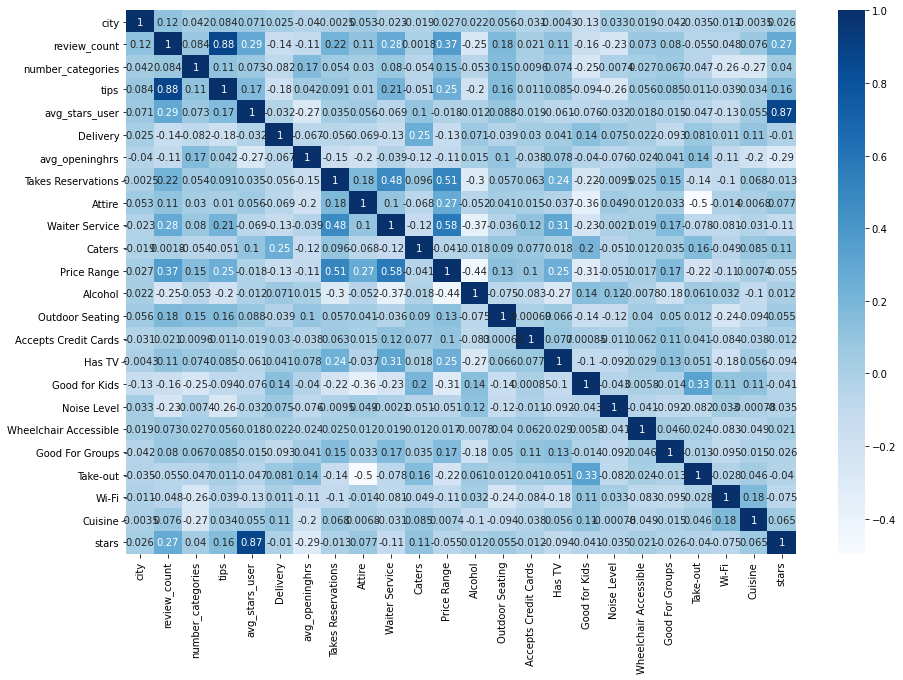

In [60]:
corr_all=final_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches

sns.heatmap(corr_all, cmap="Blues", annot=True,ax=ax)

In [61]:
final_df["stars"]=restaurants_df["stars"]

<AxesSubplot:>

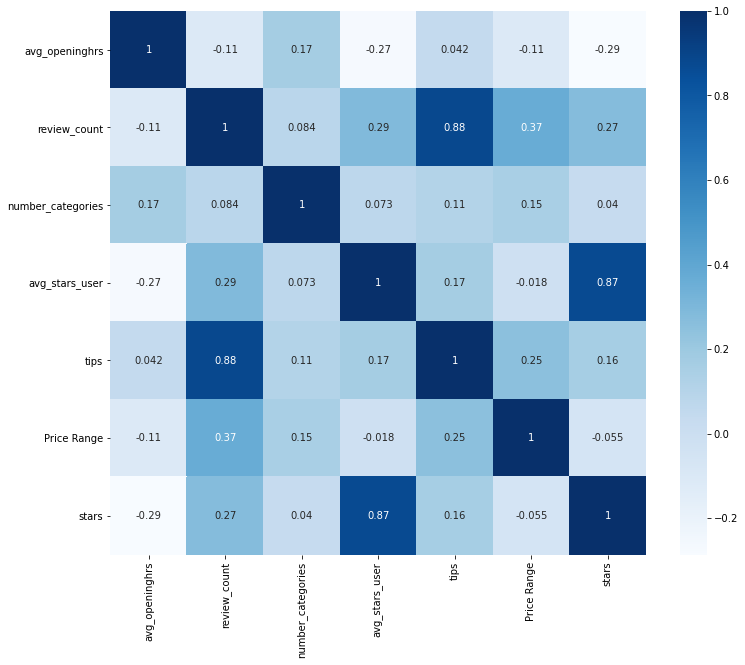

In [62]:
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches

sns.heatmap(corr_cont, cmap="Blues", annot=True,ax=ax)


In [63]:
from scipy.stats import spearmanr

pvals = pd.DataFrame([[spearmanr(final_df[cont_cols][c], final_df[cont_cols][y])[1] for y in final_df[cont_cols].columns] for c in final_df[cont_cols].columns], columns=final_df[cont_cols].columns, index=final_df[cont_cols].columns)
pvals

,avg_openinghrs,review_count,number_categories,avg_stars_user,tips,Price Range,stars
avg_openinghrs,0.000000e+00,1.666311e-08,1.127324e-18,4.875269e-47,2.558005e-02,1.152694e-08,2.754793e-53
review_count,1.666311e-08,0.000000e+00,9.959152e-06,4.063264e-54,0.000000e+00,9.929514e-90,8.938285e-49
number_categories,1.127324e-18,9.959152e-06,0.000000e+00,1.168598e-04,2.083471e-09,9.549135e-16,3.634814e-02
avg_stars_user,4.875269e-47,4.063264e-54,1.168598e-04,0.000000e+00,8.029920e-19,3.558873e-01,0.000000e+00
tips,2.558005e-02,0.000000e+00,2.083471e-09,8.029920e-19,0.000000e+00,3.365063e-41,8.370197e-18
Price Range,1.152694e-08,9.929514e-90,9.549135e-16,3.558873e-01,3.365063e-41,0.000000e+00,3.619262e-03
stars,2.754793e-53,8.938285e-49,3.634814e-02,0.000000e+00,8.370197e-18,3.619262e-03,0.000000e+00


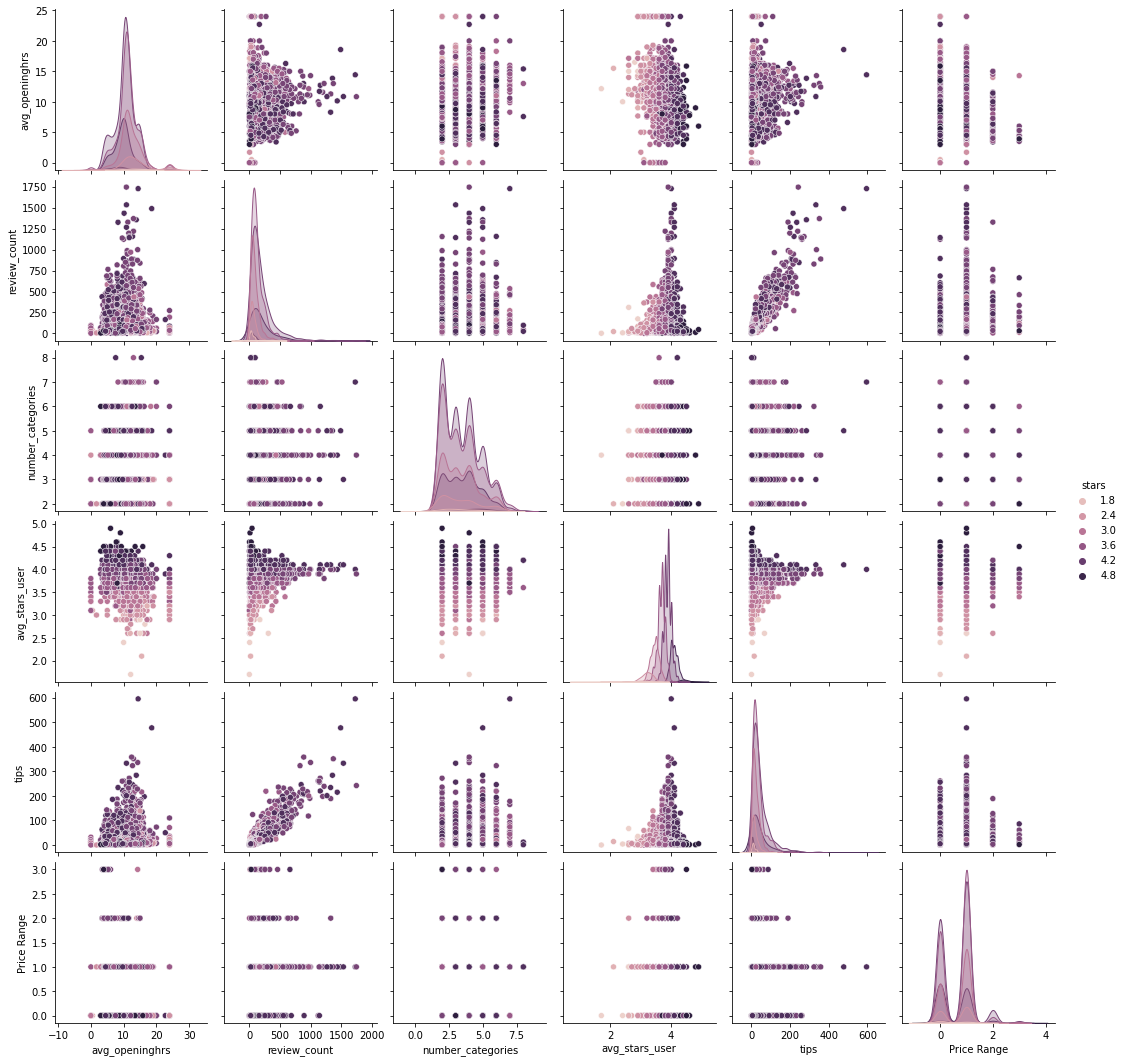

In [64]:
g = sns.pairplot(final_df[cont_cols],hue = 'stars')


In [65]:
# Categorical variables correlation analysis
categorical_cols=list(set(important_cols).difference(cont_cols))
categorical_cols.append("stars")

In [66]:
final_df[categorical_cols]=final_df[categorical_cols].astype(object)

In [68]:
#!pip install association-metrics

#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
# Import association_metrics  
import association_metrics as am
# Convert you str columns to Category columns
df = final_df[categorical_cols].apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)

# Initialize a CamresV object using you pandas.DataFrame
cramersv = am.CramersV(df) 
# will return a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of the passed pandas.DataFrame
corr_cat=cramersv.fit()
corr_cat

  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3959 sha256=704716f21917ad318ae8c631707e947360fda9f45740d5bf2f8baffb5927a32a
  Stored in directory: c:\users\ernac\appdata\local\pip\cache\wheels\b4\9c\17\2dccdebc4365f2a5a620485e89f8171e6a827ade4282cacac8
Successfully built association-metrics


,Wi-Fi,Good for Kids,Outdoor Seating,city,Delivery,Has TV,Caters,Wheelchair Accessible,Waiter Service,Attire,Accepts Credit Cards,Cuisine,Alcohol,Take-out,Noise Level,Good For Groups,Takes Reservations,stars
Wi-Fi,1.000000,0.113930,0.242238,0.115132,0.059978,0.184503,0.049094,0.083872,0.081705,0.035893,0.092713,0.290851,0.117914,0.056838,0.057596,0.094995,0.109397,0.077204
Good for Kids,0.113930,1.000000,0.141059,0.251598,0.136136,0.100082,0.204564,0.005839,0.231766,0.355374,0.000847,0.544714,0.350805,0.330152,0.142141,0.014061,0.222899,0.094815
Outdoor Seating,0.242238,0.141059,1.000000,0.205569,0.038691,0.066389,0.089577,0.040285,0.036410,0.040682,0.000685,0.392383,0.190943,0.011613,0.150067,0.050245,0.057111,0.104890
city,0.115132,0.251598,0.205569,1.000000,0.131553,0.141673,0.127563,0.170352,0.179248,0.243760,0.265752,0.161553,0.193656,0.212712,0.163695,0.146174,0.204079,0.153548
Delivery,0.059978,0.136136,0.038691,0.131553,1.000000,0.041373,0.253803,0.021701,0.127215,0.068690,0.029868,0.498287,0.188930,0.081302,0.122881,0.093226,0.056419,0.042315
Has TV,0.184503,0.100082,0.066389,0.141673,0.041373,1.000000,0.017949,0.028760,0.307347,0.036645,0.077445,0.443425,0.420453,0.050688,0.139391,0.131089,0.237622,0.138492
Caters,0.049094,0.204564,0.089577,0.127563,0.253803,0.017949,1.000000,0.012241,0.121812,0.067821,0.076746,0.437647,0.054552,0.162249,0.118963,0.034597,0.096145,0.134330
Wheelchair Accessible,0.083872,0.005839,0.040285,0.170352,0.021701,0.028760,0.012241,1.000000,0.019212,0.012366,0.061700,0.228485,0.013344,0.023821,0.061320,0.045703,0.025214,0.089816
Waiter Service,0.081705,0.231766,0.036410,0.179248,0.127215,0.307347,0.121812,0.019212,1.000000,0.103222,0.115705,0.604727,0.619229,0.078476,0.042650,0.169603,0.477426,0.174060
Attire,0.035893,0.355374,0.040682,0.243760,0.068690,0.036645,0.067821,0.012366,0.103222,1.000000,0.015053,0.336631,0.147639,0.496416,0.081235,0.032737,0.177326,0.084100


<AxesSubplot:>

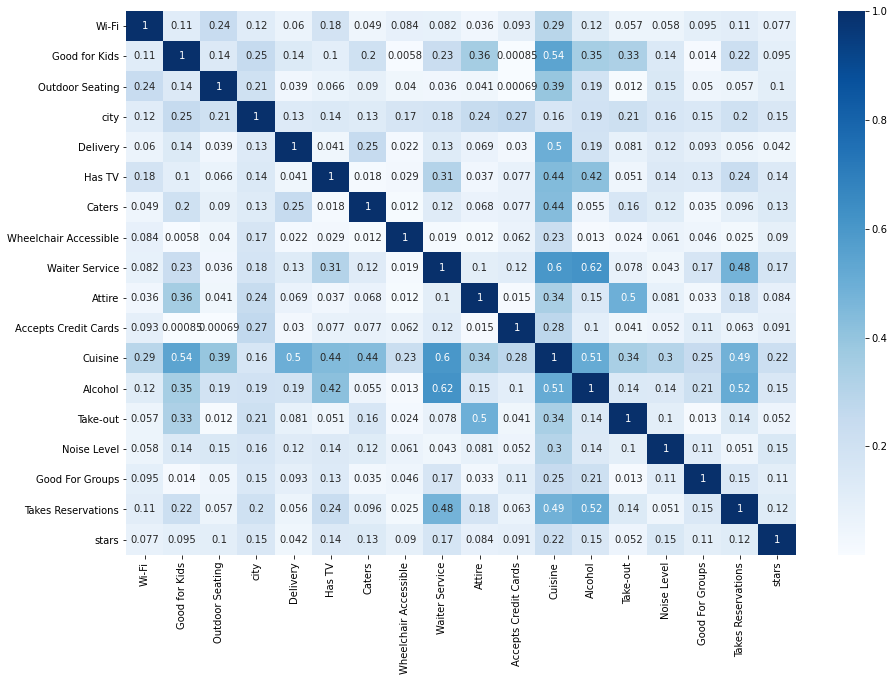

In [69]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches

sns.heatmap(corr_cat, cmap="Blues", annot=True,ax=ax)


In [70]:
#Variable selection for model 1
# Step 1: Find highly correlated pairs of variables (i.e. with correl coeff > 0.5)
# step 2: keep the one that has the highest correlation with target variable
# Step 3: Also exclude varibale with a correlation less than 10% with target varibles
corr_cont[corr_cont>0.5]
# pair is : [review_count; tips]
# variable to keep: [review_count]
var=["avg_openinghrs","review_count","avg_stars_user"]

In [71]:
corr_cat[corr_cat>0.5]
# pairs are : [Price Range; Takes Reservations]; [Alcohol; Takes Reservations]; [Price Range;Attire]
#[Price Range;Waiter Service]; [Alcohol;Waiter Service]; [Cuisine;Waiter Service];
#[Price Range;Take out]; [Alcholo;Take out]; [Cuisine;Good for kids]
corr_cat["stars"]
vars_to_keep=["Takes Reservations","Alcohol","Waiter Service","Cuisine"]
vars_to_keep2=pd.DataFrame(corr_cat["stars"]>0.1)
vars_to_keep2=list(vars_to_keep2[vars_to_keep2["stars"]==True].index)
vars_to_keep2.remove("stars")
vars_to_keep2

['Outdoor Seating',
 'city',
 'Has TV',
 'Caters',
 'Waiter Service',
 'Cuisine',
 'Alcohol',
 'Noise Level',
 'Good For Groups',
 'Takes Reservations']

In [72]:
final_var=["avg_openinghrs","review_count","avg_stars_user",'Takes Reservations',
 'Waiter Service',
 'Caters',
 'Price Range',
 'Alcohol',
 'Outdoor Seating',
 'Has TV',
 'Cuisine',
 'Noise Level',
 'Good For Groups',
 'city',"stars"]

In [73]:
final_df[final_var].to_csv("final_model1.csv",index=False)

## Exploratory data analysis

In [74]:
#most highly correlated variables to target varible: avg_star_users; review_count; Cuisine

In [75]:
final_df

,city,review_count,number_categories,tips,avg_stars_user,Delivery,avg_openinghrs,Takes Reservations,Attire,Waiter Service,...,Accepts Credit Cards,Has TV,Good for Kids,Noise Level,Wheelchair Accessible,Good For Groups,Take-out,Wi-Fi,Cuisine,stars
2377,31,20,4,5,3.3,1,14.000000,0,0,0,...,1,0,1,1,1,0,1,1,74,3
2382,31,28,4,3,2.9,0,18.000000,1,0,0,...,1,1,0,3,1,1,0,1,2,2.5
2386,31,492,2,108,3.8,0,9.428571,1,0,1,...,1,1,1,0,1,1,1,0,88,3.5
2394,31,280,4,49,3.7,0,10.714286,1,0,1,...,1,1,1,0,1,1,1,1,16,3.5
2404,31,12,4,8,3.7,0,18.285714,0,0,0,...,1,0,1,0,1,1,1,1,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85571,10,25,5,5,4.1,0,10.071429,0,0,0,...,1,0,1,0,1,1,1,0,39,4.5
85674,31,58,3,5,3.6,0,13.571429,1,0,1,...,1,1,0,1,1,1,1,0,41,3.5
85708,31,20,4,2,4.4,1,9.285714,0,0,0,...,1,0,1,0,0,1,1,1,92,4.5
85775,17,27,3,5,4.2,0,9.714286,0,0,1,...,1,1,1,0,1,1,1,0,6,4.5


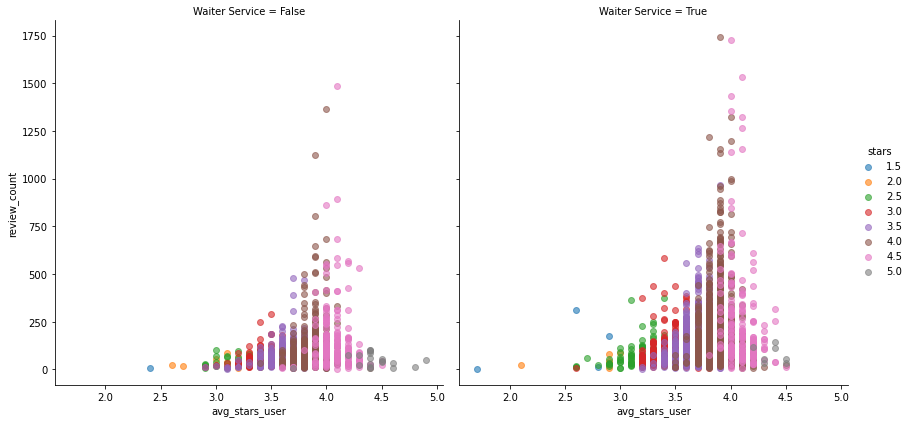

In [76]:

g= sns.FacetGrid(restaurants_df, col="Waiter Service", hue="stars",size=6)
g.map(plt.scatter, "avg_stars_user","review_count", alpha=.6)
g.add_legend()
plt.show()

<AxesSubplot:xlabel='avg_stars_user', ylabel='stars'>

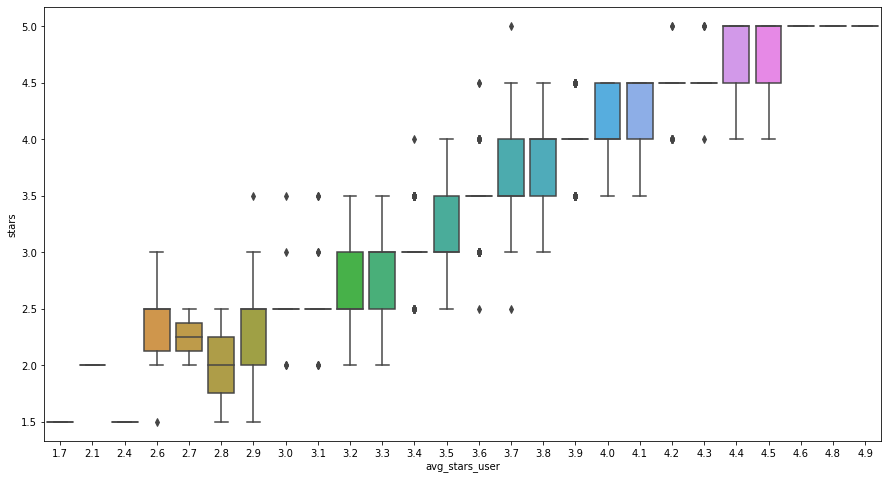

In [77]:
plt.figure(figsize=(15,8))

sns.boxplot( x=restaurants_df["avg_stars_user"],y=restaurants_df['stars'], data=restaurants_df, linewidth=1.5,) #boxplot


# PCA 

http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/115-famd-factor-analysis-of-mixed-data-in-r-essentials/#:~:text=Factor%20analysis%20of%20mixed%20data%20(FAMD)%20is%20a%20principal%20component,a%20mixed%20types%20of%20variables.

Many datasets that one will encounter in the real world will contain both continuous and categorical variables. Factor analysis for mixed data (FAMD) is a principal component method that combines principal component analysis (PCA) for continuous variables and multiple correspondence analysis (MCA) for categorical variables. 

https://github.com/MaxHalford/prince

In [100]:
final_df.columns

Index(['city', 'review_count', 'number_categories', 'tips', 'avg_stars_user',
       'Delivery', 'avg_openinghrs', 'Takes Reservations', 'Attire',
       'Waiter Service', 'Caters', 'Price Range', 'Alcohol', 'Outdoor Seating',
       'Accepts Credit Cards', 'Has TV', 'Good for Kids', 'Noise Level',
       'Wheelchair Accessible', 'Good For Groups', 'Take-out', 'Wi-Fi',
       'Cuisine', 'stars'],
      dtype='object')

In [101]:
#PCA for plotting purposes
#!pip install prince
import prince
temo_var=["avg_openinghrs","review_count","number_categories","avg_stars_user","tips","city","Cuisine", 'Noise Level','Alcohol','Waiter Service']

pca = prince.PCA( n_components=2, n_iter=3, rescale_with_mean=True, rescale_with_std=True,copy=True,check_input=True,engine='auto',random_state=42)


In [102]:
#Once the PCA has been fitted, it can be used to extract the row principal coordinates as so:
X=final_df[num_var]
pca = pca.fit(X)
pca.transform(X).head()
#Each column stands for a principal component whilst each row stands a row in the original dataset. You can display these projections with the plot_row_coordinates method:

,0,1
2377,-1.461131,1.424736
2382,-1.970163,2.966263
2386,2.383801,-0.501345
2394,0.744531,0.274693
2404,-1.108276,1.641944


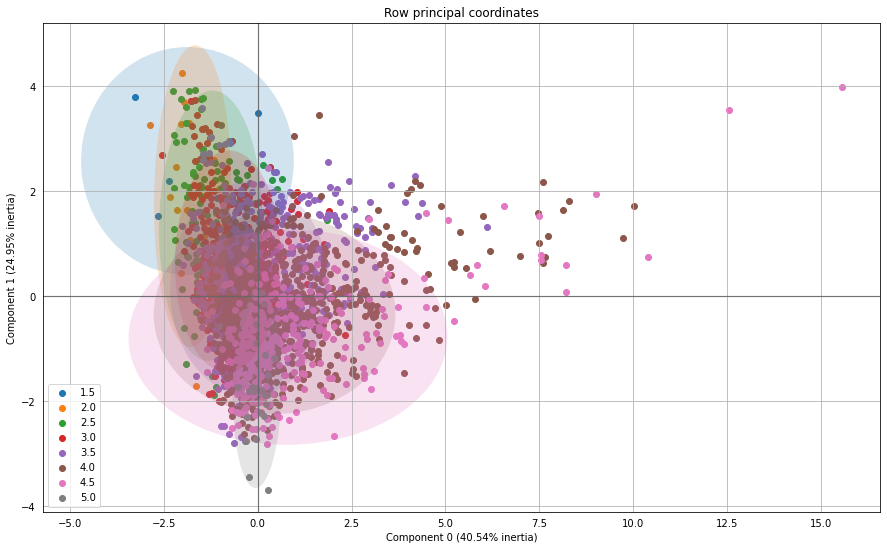

In [103]:
y=final_df["stars"]
ax = pca.plot_row_coordinates( X, ax=None,figsize=(15, 9), x_component=0, y_component=1,labels=None,color_labels=y, ellipse_outline=False, ellipse_fill=True, show_points=True)

In [83]:
#Each principal component explains part of the underlying of the distribution. You can see by how much by using the accessing the explained_inertia_ property:
#The explained inertia represents the percentage of the inertia each principal component contributes. It sums up to 1 if the n_components property is equal to the number of columns in the original dataset. you The explained inertia is obtained by dividing the eigenvalues obtained with the SVD by the total inertia, both of which are also accessible.

pca.explained_inertia_

array([0.40543387, 0.24947263])

In [84]:
#You can also obtain the correlations between the original variables and the principal components.

pca.column_correlations(X)

,0,1
avg_openinghrs,-0.104222,0.835487
avg_stars_user,0.431967,-0.555710
number_categories,0.231736,0.452140
review_count,0.949610,0.055188
tips,0.935014,0.181752


In [85]:
#You can also transform row projections back into their original space by using the inverse_transform method.

pca.inverse_transform(pca.transform(X))

,0,1,2,3,4
2377,15.100917,0.995662,3.867439,3.406765,5.030795
2382,19.305576,-43.467070,4.576396,3.144664,1.506076
2386,9.017693,417.919845,3.665785,4.011175,98.471108
2394,11.491984,239.789425,3.727822,3.759876,58.322876
2404,15.583599,42.544369,4.057857,3.406474,16.314760
...,...,...,...,...,...
85571,9.746437,106.446901,3.078726,3.771729,21.753341
85674,12.595609,33.320885,3.458644,3.566661,8.592265
85708,7.031545,114.394076,2.572439,3.927704,18.827461
85775,7.485509,84.954552,2.591400,3.883668,12.273755


## MultiCorrespondence Analysis

Multiple correspondence analysis (MCA)
Multiple correspondence analysis (MCA) is an extension of correspondence analysis (CA). It should be used when you have more than two categorical variables. The idea is simply to compute the one-hot encoded version of a dataset and apply CA on it. 

In [86]:
cat_var=list(set(important_cols).difference(cont_cols))
Y=final_df[cat_var]

In [87]:
mca = prince.MCA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(Y)

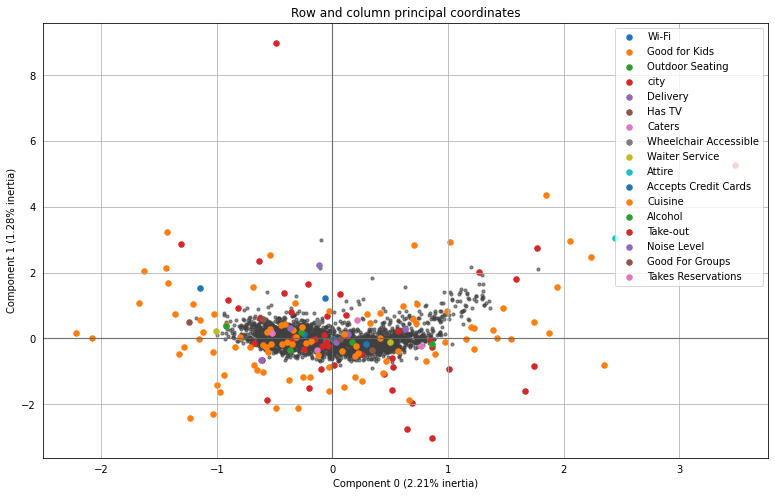

In [88]:
ax = mca.plot_coordinates(X=Y,ax=None,
...     figsize=(13, 8),
...     show_row_points=True,
...     row_points_size=10,
...     show_row_labels=False,
...     show_column_points=True,
...     column_points_size=30,
...     show_column_labels=False,
...     legend_n_cols=1
... )

In [89]:
mca.explained_inertia_


[0.022080546428430062, 0.012837181371980195]